In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.model_selection import train_test_split

In [12]:
import time
import datetime

In [36]:
#scraping
ticker = 'AAPL'
p1 = int(time.mktime(datetime.datetime(2014, 12, 1, 23, 59).timetuple()))
p2 = int(time.mktime(datetime.datetime(2024, 12, 31, 23, 59).timetuple()))
interval= '1d'


In [37]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={interval}&events=history&includeAdjustedClose=true'

In [38]:
df=pd.read_csv(query_string)

In [39]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-01,29.702499,29.812500,27.817499,28.767500,25.683327,335256000
1,2014-12-02,28.375000,28.937500,28.187500,28.657499,25.585112,237395600
2,2014-12-03,28.937500,29.087500,28.777500,28.982500,25.875275,172253600
3,2014-12-04,28.942499,29.299999,28.822500,28.872499,25.777065,168178000
4,2014-12-05,28.997499,29.020000,28.660000,28.750000,25.667700,153275600


In [40]:
df.shape

(2410, 7)

In [41]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2405,2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2406,2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2407,2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2408,2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2409,2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82475600


In [45]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,29.702499,29.812500,27.817499,28.767500,335256000
1,28.375000,28.937500,28.187500,28.657499,237395600
2,28.937500,29.087500,28.777500,28.982500,172253600
3,28.942499,29.299999,28.822500,28.872499,168178000
4,28.997499,29.020000,28.660000,28.750000,153275600


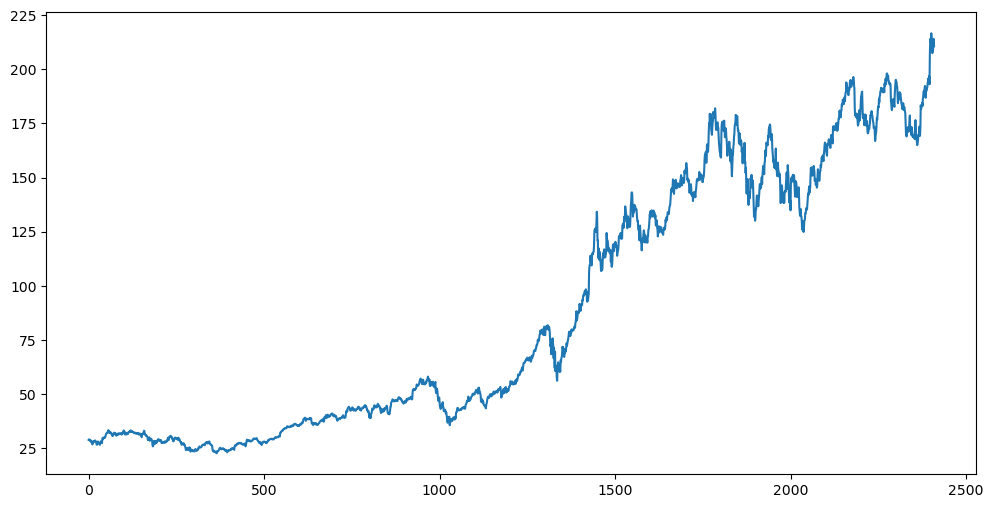

In [55]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)

In [49]:
#moving average 
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2405    182.3539
2406    182.6006
2407    182.8645
2408    183.1470
2409    183.3764
Name: Close, Length: 2410, dtype: float64

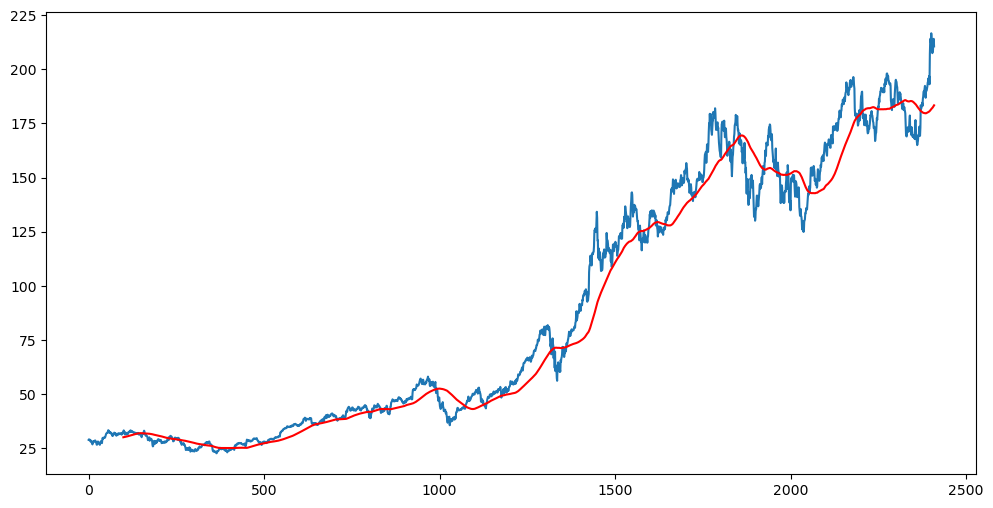

In [54]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [50]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2405    183.01765
2406    183.17520
2407    183.35055
2408    183.52425
2409    183.69585
Name: Close, Length: 2410, dtype: float64

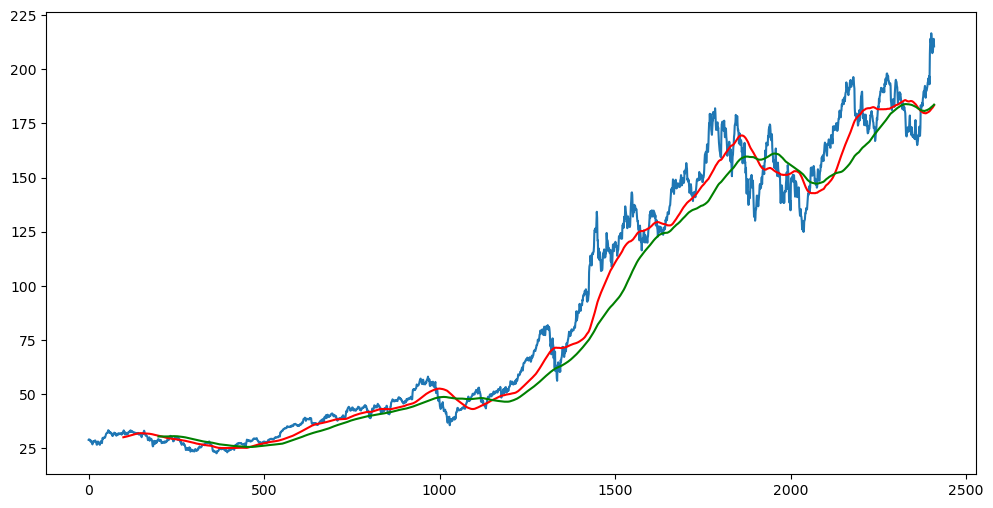

In [57]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [59]:
#splitting data

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [60]:
print(data_train)
print(data_test)

           Close
0      28.767500
1      28.657499
2      28.982500
3      28.872499
4      28.750000
...          ...
1682  146.139999
1683  146.089996
1684  145.600006
1685  145.860001
1686  148.889999

[1687 rows x 1 columns]
           Close
1687  149.100006
1688  151.119995
1689  150.190002
1690  146.360001
1691  146.699997
...          ...
2405  208.139999
2406  209.070007
2407  213.250000
2408  214.100006
2409  210.619995

[723 rows x 1 columns]


In [65]:
#another way of splitting data
prices = df[['Close']]
df_train, df_test = train_test_split(prices, test_size=0.30, random_state=42, shuffle=False)

print(df_test.head())

           Close
1687  149.100006
1688  151.119995
1689  150.190002
1690  146.360001
1691  146.699997


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [68]:
data_training_array = scaler.fit_transform(data_train)
data_training_array

array([[0.04884843],
       [0.0479793 ],
       [0.05054716],
       ...,
       [0.97195127],
       [0.97400551],
       [0.99794576]])

In [71]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
        x_train.append(data_training_array[i-100:i])
        y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [82]:
# ML models

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [87]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences = True, 
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [88]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - loss: 0.0682
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - loss: 0.0083
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 0.0071
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 0.0063
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0062
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - loss: 0.0049
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step - loss: 0.0054
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - loss: 0.0049
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 0.0060
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - loss: 0.0040
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - loss: 0.0055
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.0041
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - loss: 0.0043
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - loss: 0.0043
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step

In [92]:
model.save('keras_model.h5')

In [93]:
data_test.head()

,Close
1687,149.100006
1688,151.119995
1689,150.190002
1690,146.360001
1691,146.699997


In [94]:
past_100_days= data_train.tail(100)

In [96]:
final_df=past_100_days.append(data_test,ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5720\2545936607.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_test,ignore_index=True)


In [97]:
final_df.head()

,Close
0,122.540001
1,120.089996
2,120.589996
3,121.209999
4,121.389999


In [98]:
input_data=scaler.fit_transform(final_df)

In [100]:
input_data.shape

(823, 1)

In [102]:
x_test = []
y_test = []

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,[0]])

In [106]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
y_test.shape

(723, 100, 1)


(723, 1)

In [108]:
#making predictions 

y_predict = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step


In [110]:
y_predict.shape

(723, 1)

In [111]:
scaler.scale_

array([0.01033378])

In [113]:
scaler=1/0.01033378

y_predict=y_predict*scaler
y_test=y_test*scaler

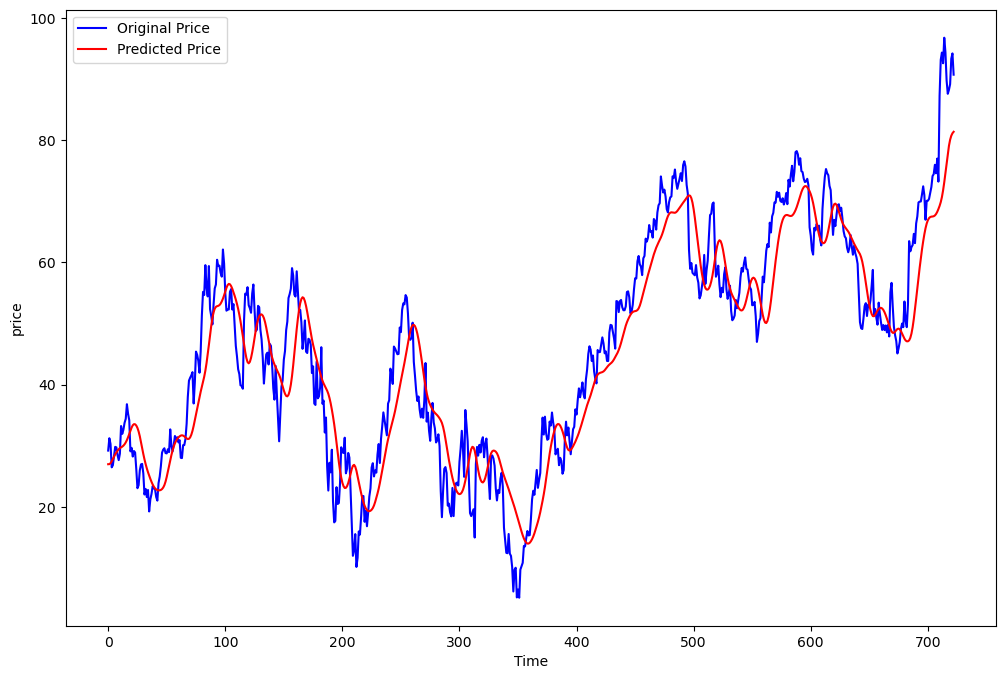

In [115]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict, 'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()